# Mediciones

## Imports

In [30]:
import time
import random
from k_merge_dyc import k_merge_dyc
from k_merge_heap import k_merge_heap
import matplotlib.pyplot as plt

In [2]:
NUMERO_MAXIMO = 999

## Funciones auxiliares

In [64]:
def armar_arreglos_aleatorios(cant_listas, cant_digitos):
    arreglos = []
    for i in range(cant_listas):
        arreglo = []
        for j in range(cant_digitos):
            nro_random = random.randint(0, NUMERO_MAXIMO)
            arreglo.append(nro_random)
        arreglo.sort()
        arreglos.append(arreglo)
    return arreglos

In [50]:
def armar_arreglos(cant_arreglos, cant_digitos):
    arreglos = []
    contador = 0
    for i in range(cant_arreglos):
        arreglo = []
        for j in range(cant_digitos):
            arreglo.append(contador)
            contador += 1
        arreglos.append(arreglo)
    return arreglos

In [10]:
def obtener_tiempos_k_variable(cantidad_elementos, n_arreglos, k_merge, armar_arreglos):
    tiempos = []
    for cant in n_arreglos:
        arreglos = armar_arreglos(cant, cantidad_elementos)
        start_time = time.time()
        k_merge(arreglos)  
        end_time = time.time()
        tiempos.append(end_time - start_time)  
    
    return tiempos

In [19]:
def obtener_tiempos_h_variable(cantidad_elementos, n_arreglos, k_merge, armar_arreglos):
    tiempos = []
    for cant in cantidad_elementos:
        arreglos = armar_arreglos(n_arreglos, cant)
        start_time = time.time()
        k_merge(arreglos)  
        end_time = time.time()
        tiempos.append(end_time - start_time)  
    
    return tiempos

## Gráficos

### D&C vs Heap con _k_ variable

In [42]:
cantidad_elementos = 100
nro_arreglos_maximo = 1000
saltos = 10

cantidades_arreglos = [i for i in range(0, nro_arreglos_maximo, saltos)]

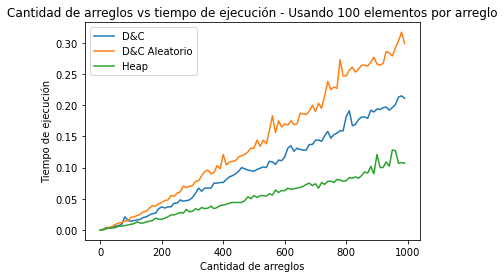

In [70]:
tiempos_dyc = obtener_tiempos_k_variable(cantidad_elementos, cantidades_arreglos, k_merge_dyc, armar_arreglos)
tiempos_dyc_aleatorio = obtener_tiempos_k_variable(cantidad_elementos, cantidades_arreglos, k_merge_dyc, armar_arreglos_aleatorios)
tiempos_heap = obtener_tiempos_k_variable(cantidad_elementos, cantidades_arreglos, k_merge_heap, armar_arreglos)

plt.plot(cantidades_arreglos, tiempos_dyc, label='D&C')
plt.plot(cantidades_arreglos, tiempos_dyc_aleatorio, label='D&C Aleatorio')
plt.plot(cantidades_arreglos, tiempos_heap, label='Heap')
plt.title(f'Cantidad de arreglos vs tiempo de ejecución - Usando {cantidad_elementos} elementos por arreglo')
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()

### D&C vs Heap con _h_ variable

In [60]:
cantidad_elementos_maxima = 1000
n_arreglos = 100
saltos = 10

cantidades_elementos = [i for i in range(0, cantidad_elementos_maxima, saltos)]

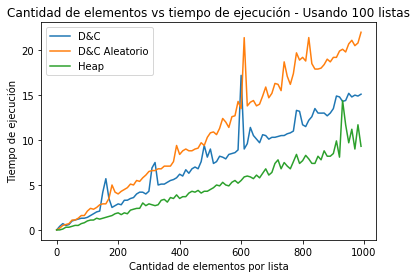

In [72]:
tiempos_dyc = obtener_tiempos_h_variable(cantidades_elementos, n_arreglos, k_merge_dyc, armar_arreglos)
tiempos_dyc_aleatorio = obtener_tiempos_h_variable(cantidades_elementos, n_arreglos, k_merge_dyc, armar_arreglos_aleatorios)
tiempos_heap = obtener_tiempos_h_variable(cantidades_elementos, n_arreglos, k_merge_heap, armar_arreglos)

plt.plot(cantidades_elementos, tiempos_dyc, label="D&C")
plt.plot(cantidades_elementos, tiempos_dyc_aleatorio, label='D&C Aleatorio')
plt.plot(cantidades_elementos, tiempos_heap, label="Heap")
plt.title(f'Cantidad de elementos vs tiempo de ejecución - Usando {n_arreglos} listas')
plt.xlabel('Cantidad de elementos por lista')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()